In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets/algerian_forest_fires_cleaned_no_time_series.csv")

In [3]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [4]:
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

### Splitting into independent and dependent features

In [5]:
X = df.drop(['FWI', 'Classes'], axis=1)
y = df['FWI']

In [6]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0


In [7]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

# Train, test, split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
X_train.shape, X_test.shape

((182, 10), (61, 10))

# Feature Selection based on correlation

In [10]:
corr = X_train.corr()

### Check for Multicollinearity

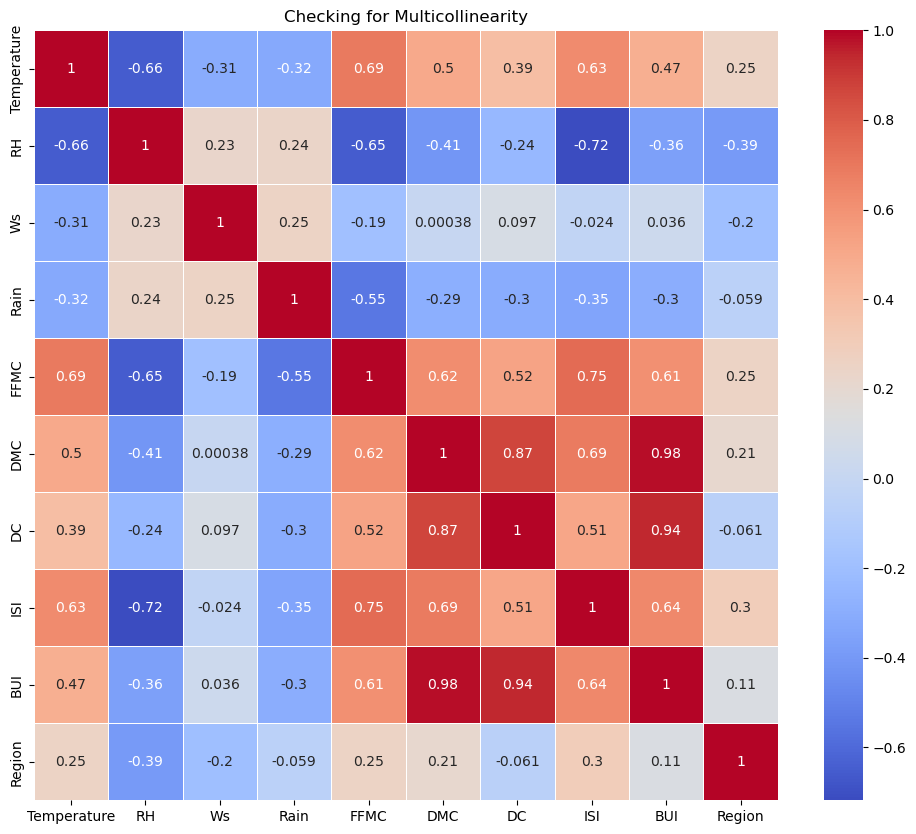

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Checking for Multicollinearity")
plt.show()

In [12]:
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.114897
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,-0.060838,0.296441,0.114897,1.000000


In [13]:
# find features with high correlation
def correlation(corr, threshold):
    # Get the upper triangle of the correlation matrix
    upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    # Find features with correlation above threshold or below -threshold
    high_corr = upper_triangle[(upper_triangle > threshold) | (upper_triangle < -threshold)]
    
    # Filtering out rows with high correlation
    high_corr.dropna(axis=0, how='all', inplace=True)
    
    # Get the feature names with high correlation
    high_corr_features = high_corr.index.tolist()

    return high_corr_features

In [14]:
# threshold = 0.85
high_corr_features = correlation(corr, 0.85)

DMC and DC have high correlations with other features

In [15]:
# Dropping independent features with high correlations
X_train.drop(high_corr_features, axis=1, inplace=True)
X_test.drop(high_corr_features, axis=1, inplace=True)

In [16]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'ISI', 'BUI', 'Region'], dtype='object')

# Feature Scaling - Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled[:3]

array([[-0.84284248,  0.78307967,  1.29972026, -0.33727373, -0.12805583,
        -0.62963326, -0.77269802, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, -0.29048728, -1.21758569,
        -0.93058524, -0.90344718,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, -0.38406017,  1.15703067,
         2.7271388 ,  0.38339978,  1.01105006]])

### Looking for outliers

C:\Users\sharo\AppData\Local\Temp\ipykernel_2388\3944142514.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train data after scaling')

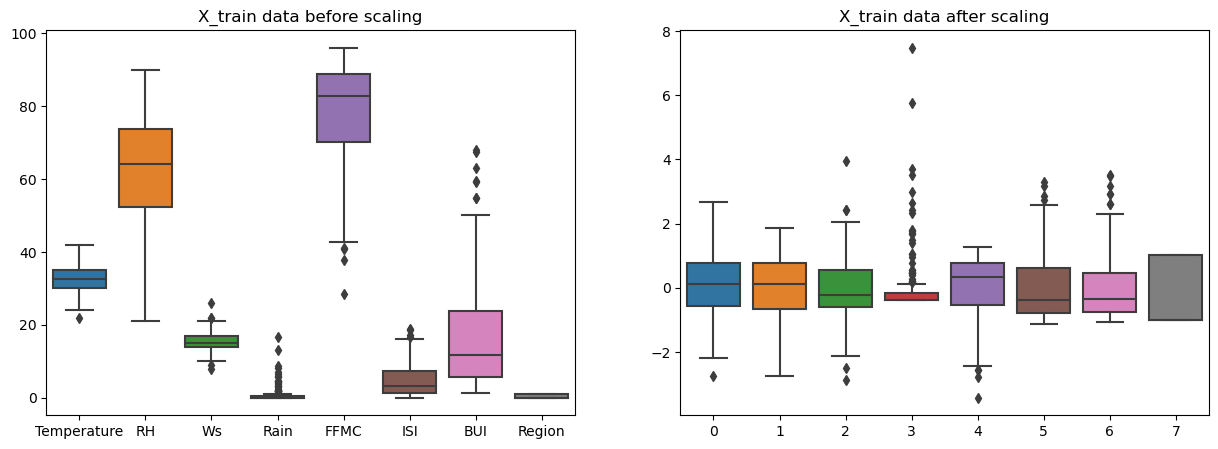

In [20]:
# Box Plots to understand effect of standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("X_train data before scaling")
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train data after scaling")

# Model Training & Hyperparameter Tuning

## Linear Regression Model

MAE: 0.49555233164575396
R2 Score: 0.9879066709932198


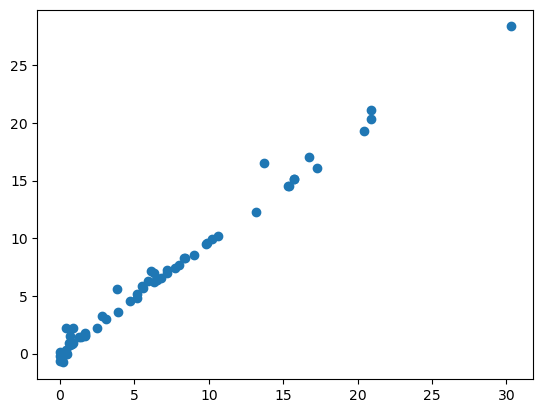

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'MAE: {mae}\nR2 Score: {score}')
plt.scatter(y_test, y_pred)

## Lasso Regression - L1 Regularization

MAE: 1.0405718849125525
R2 Score: 0.9558984658448342


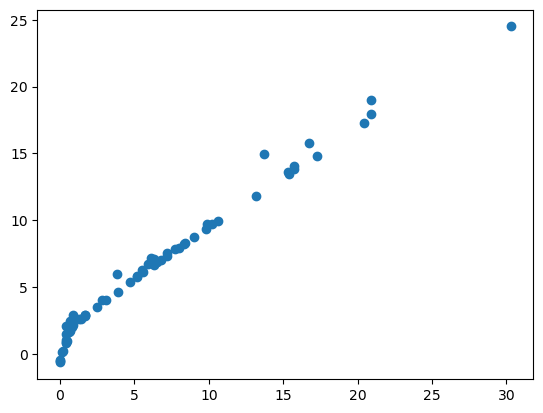

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'MAE: {mae}\nR2 Score: {score}')
plt.scatter(y_test, y_pred)

### Cross Validation - Lasso

In [23]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [24]:
lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [25]:
lassocv.alpha_

0.06139149443725231

In [26]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [27]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [47.26613   , 59.81506814, 49.36616448, 75.6645852 , 35.31758355],
       [41.40197628, 53.9178721 , 42.62662998, 68.35708298, 31.76996123],
       [36.29079716, 48.71817989, 36.84693344, 61.92819453, 28.67296816],
       [31.83511969, 43.80347458, 31.89610181, 56.26841266, 25.96868127],
       [27.94997716, 38.62564602, 27.66155505, 51.28216115, 22.53681293],
       [24.56225298, 34.0989428 , 24.04493218, 46.25876937, 19.37785572],
       [21.6074818 , 30.14005229, 20.96095158, 40.82189611, 16.65829705],
       [19.02983048, 26.67621492, 18.33673046, 36.06710378, 14.31896832],
       [16.78070058, 23.64485516, 16.10815028, 31.90726356, 12.30867857],
       [14.81744382, 20.99065493, 14.22005003, 28.26652442, 10.58289153],
       [13.10396696, 18.66568017, 12.62469821, 25.07880433,  9.10302316],
       [11.6078159 , 16.62816008, 11.28059144, 22.28652528,  7.835618  ],
       [10.30107821, 14.84168967, 10.1

MAE: 0.5059332554125562
R2 Score: 0.9869948887151483


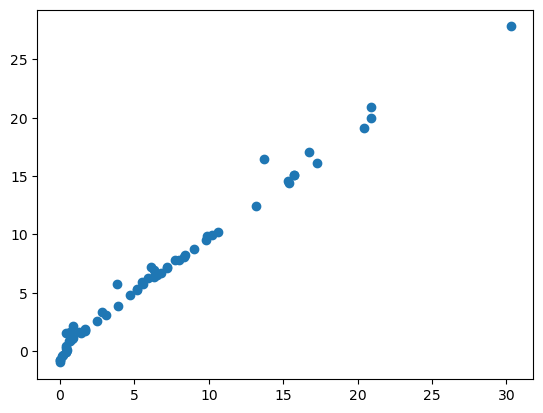

In [28]:
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'MAE: {mae}\nR2 Score: {score}')
plt.scatter(y_test, y_pred)

## Ridge Regression

MAE: 0.5028392157792358
R2 Score: 0.987523869441293


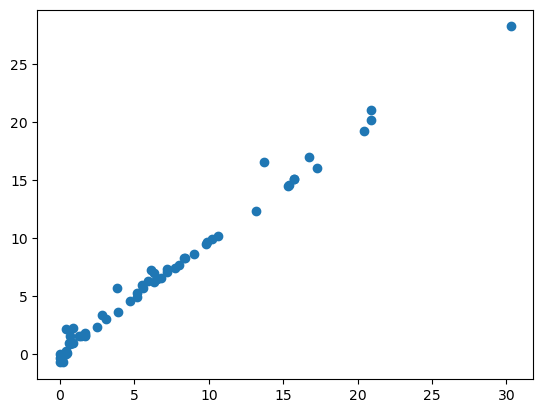

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'MAE: {mae}\nR2 Score: {score}')
plt.scatter(y_test, y_pred)

### Ridge Regression - Cross Validation

MAE: 0.5028392157792358
R2 Score: 0.987523869441293


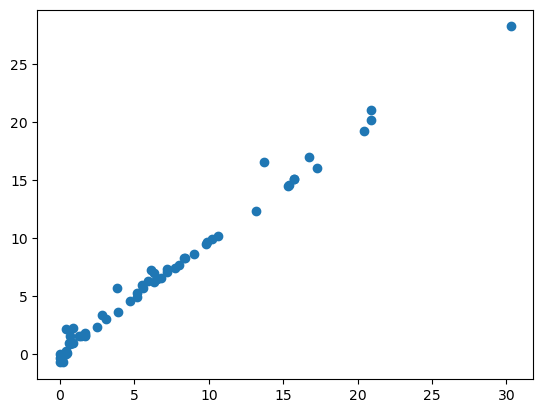

In [30]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'MAE: {mae}\nR2 Score: {score}')
plt.scatter(y_test, y_pred)

In [31]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

In [32]:
ridgecv.alphas

(0.1, 1.0, 10.0)

## Elastic Net - Ridge and Lasso

MAE: 1.8847793648545517
R2 Score: 0.8737903380624359


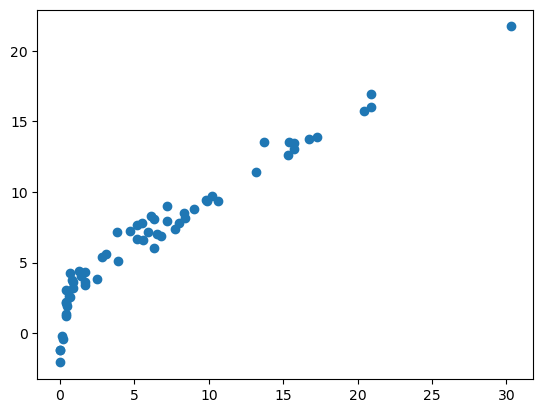

In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'MAE: {mae}\nR2 Score: {score}')
plt.scatter(y_test, y_pred)

### ElasticNet - Cross Validation

MAE: 0.5721669029112088
R2 Score: 0.9850554359226995


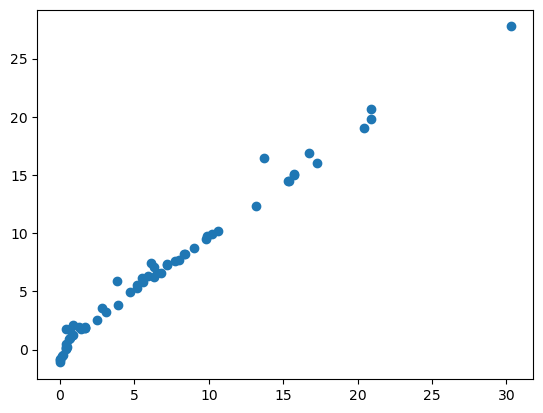

In [34]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'MAE: {mae}\nR2 Score: {score}')
plt.scatter(y_test, y_pred)

In [35]:
elasticnetcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

#### Ridge Regression seems to have the best accuracy

## Pickling Prepocessor(Standard Scaler) and Model(Ridge)

In [36]:
import pickle

pickle.dump(scaler, open("Datasets/scaler.pkl", 'wb'))
pickle.dump(ridge, open("Datasets/ridge.pkl", 'wb'))